# Classification

In [62]:
import pandas as pd
import glob

from analysis import classification
from analysis.utils import resolve_split_csv_path
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load classification summaries
path_class_adni_psp = "/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all/adni_psp/summary_all_seeds.csv"
path_class_adni_cbs ="/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all/adni_cbs/summary_all_seeds.csv"
path_class_cbs_psp =  '/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all/cbs_psp/summary_all_seeds.csv'

# Load network classification summaries
path_class_net_adni_psp = '/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification/adni_psp/summary_all_seeds.csv'
path_class_net_adni_cbs = '/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification/adni_cbs/summary_all_seeds.csv'
path_class_net_psp_cbs = '/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification/psp_cbs/summary_all_seeds.csv'

# Load split dataframes
dir_split = "/Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/split"

# Dataframes voxel classification
df_classs_adni_psp = pd.read_csv(path_class_adni_psp)
df_classs_adni_cbs = pd.read_csv(path_class_adni_cbs)
df_classs_cbs_psp = pd.read_csv(path_class_cbs_psp)

# Dataframe network classification
df_classs_net_adni_psp = pd.read_csv(path_class_net_adni_psp)
df_classs_net_adni_cbs = pd.read_csv(path_class_net_adni_cbs)
df_classs_net_cbs_psp = pd.read_csv(path_class_net_psp_cbs)


# Separate cross-validation and test metrics
cv_metrics = ["cv_accuracy", "cv_precision", "cv_recall", "cv_f1", "cv_auc_roc"]
test_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_auc_roc"]

In [63]:
def get_variables(df):
    # Group by model
    grouped = df.groupby("model")

    return  grouped

def print_info(df_split, df_class):
    print(f"Number of seeds: {df_class['seed'].nunique()} and seeds: {df_class['seed'].unique()}")
    print(f"Number of models: {df_class['model'].nunique()} and types: {df_class['model'].unique()}\n")
    print(f"Training set size: {(df_split['split'] == 'train').sum()}")
    print(f"Test set size: {(df_split['split'] == 'test').sum()}")


def print_result_test(grouped, group1, group2):
    print(f"\nGroup {group1} vs {group2}\n")
    print("=== Test performance on holdout set across seeds=== ")
    for model_name, group in grouped:
        print(f"\nModel: {model_name}")
        #display(group[test_metrics].agg(["mean", "std"]).round(3))
        print(group[test_metrics].agg(["mean", "std"]).round(3))
    print("\n")

# Voxel classification

## ADNI vs PSP

In [64]:
# Extract number of seeds and grouped data
group1 = "ADNI"
group2 = "PSP"
split_path = resolve_split_csv_path(dir_split, group1 , group2)
df_split = pd.read_csv(split_path)

print_info(df_split, df_classs_adni_psp)


Using split file: /Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/split/ADNI_PSP_splitted.csv

Number of seeds: 5 and seeds: [   42   123  2023 31415 98765]
Number of models: 3 and types: ['RandomForest' 'GradientBoosting' 'KNN']

Training set size: 105
Test set size: 27


In [65]:
grouped_adni_psp = get_variables(df_classs_adni_psp)
print_result_test(grouped_adni_psp, group1, group2)


Group ADNI vs PSP

=== Test performance on holdout set across seeds=== 

Model: GradientBoosting
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.667           0.665        0.665    0.663         0.729
std           0.026           0.029        0.030    0.028         0.012

Model: KNN
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.704           0.706        0.708    0.703         0.706
std           0.000           0.000        0.000    0.000         0.000

Model: RandomForest
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.637           0.632        0.632    0.632         0.706
std           0.041           0.042        0.042    0.042         0.007




## ADNI vs CBS

In [66]:
group1 = "ADNI"
group2 = "CBS"
split_path = resolve_split_csv_path(dir_split, group1 , group2)
df_split = pd.read_csv(split_path)

print_info(df_split, df_classs_adni_cbs)


Using split file: /Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/split/ADNI_CBS_splitted.csv

Number of seeds: 5 and seeds: [   42   123  2023 31415 98765]
Number of models: 3 and types: ['RandomForest' 'GradientBoosting' 'KNN']

Training set size: 92
Test set size: 24


In [67]:
grouped_adni_cbs = get_variables(df_classs_adni_cbs)
print_result_test(grouped_adni_cbs, group1, group2)



Group ADNI vs CBS

=== Test performance on holdout set across seeds=== 

Model: GradientBoosting
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.667           0.642          0.6    0.597         0.585
std           0.000           0.000          0.0    0.000         0.000

Model: KNN
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.583           0.556        0.556    0.556         0.526
std           0.000           0.000        0.000    0.000         0.000

Model: RandomForest
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.650           0.619        0.604    0.606         0.578
std           0.023           0.028        0.025    0.028         0.015




## PSP vs CBS

In [68]:
## ADNI vs CBS
group1 = "PSP"
group2 = "CBS"
split_path = resolve_split_csv_path(dir_split, group1, group2)
df_split = pd.read_csv(split_path)

print_info(df_split, df_classs_cbs_psp)


Using split file: /Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/split/PSP_CBS_splitted.csv

Number of seeds: 5 and seeds: [   42   123  2023 31415 98765]
Number of models: 3 and types: ['RandomForest' 'GradientBoosting' 'KNN']

Training set size: 83
Test set size: 21


In [69]:
grouped_psp_cbs = get_variables(df_classs_cbs_psp)
print_result_test(grouped_psp_cbs, group1, group2)


Group PSP vs CBS

=== Test performance on holdout set across seeds=== 

Model: GradientBoosting
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.552           0.540        0.539    0.539         0.567
std           0.026           0.024        0.023    0.022         0.010

Model: KNN
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.571           0.558        0.556    0.555         0.477
std           0.000           0.000        0.000    0.000         0.000

Model: RandomForest
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.524           0.514        0.514    0.514         0.470
std           0.000           0.000        0.000    0.000         0.031




# Networks Classification

## ADNI vs PSP

In [70]:
df_net_noThr = pd.read_csv('/Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/networks/networks_noTHR.csv')

In [71]:
group1 = "ADNI"
group2 = "PSP"

grouped_net_adni_psp = get_variables(df_classs_net_adni_psp)
print_result_test(grouped_net_adni_psp, group1, group2)


Group ADNI vs PSP

=== Test performance on holdout set across seeds=== 

Model: GradientBoosting
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.600           0.593        0.582    0.578         0.648
std           0.031           0.036        0.028    0.026         0.019

Model: KNN
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.519           0.525        0.525    0.519         0.586
std           0.000           0.000        0.000    0.000         0.000

Model: RandomForest
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.615           0.611        0.610    0.609         0.655
std           0.020           0.018        0.017    0.018         0.020




## ADNI vs CBS

In [72]:
group1 = "ADNI"
group2 = "CBS"

grouped_net_adni_cbs = get_variables(df_classs_net_adni_cbs)
print_result_test(grouped_net_adni_cbs, group1, group2)



Group ADNI vs CBS

=== Test performance on holdout set across seeds=== 

Model: GradientBoosting
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.583           0.516        0.511    0.496         0.548
std           0.000           0.000        0.000    0.000         0.000

Model: KNN
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.583           0.476        0.489    0.444          0.53
std           0.000           0.000        0.000    0.000          0.00

Model: RandomForest
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.625           0.588        0.558     0.55         0.538
std           0.059           0.090        0.056     0.06         0.023




## PSP vs CBS

In [73]:
group1 = "PSP"
group2 = "CBS"

grouped_net_cbs_psp = get_variables(df_classs_net_cbs_psp)
print_result_test(grouped_net_cbs_psp, group1, group2)


Group PSP vs CBS

=== Test performance on holdout set across seeds=== 

Model: GradientBoosting
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.752           0.775        0.725    0.729         0.678
std           0.021           0.017        0.025    0.028         0.016

Model: KNN
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.619           0.613        0.583    0.571         0.546
std           0.000           0.000        0.000    0.000         0.000

Model: RandomForest
      test_accuracy  test_precision  test_recall  test_f1  test_auc_roc
mean          0.705           0.705        0.683    0.685         0.668
std           0.021           0.021        0.025    0.027         0.015




# Analysis of results

In [74]:
import pandas as pd
from collections import Counter

def summarize_subject_predictions(prediction_files: dict):
    """
    Args:
        prediction_files: dict of {name: path_to_csv}

    Returns:
        dict of {name: df_summary} for each prediction file
    """
    summaries = {}

    for name, path in prediction_files.items():
        df = pd.read_csv(path)
        df = df[df["Model"] != "SVM"]
        grouped = df.groupby("ID")
        summary = []

        for subj_id, group in grouped:
            true_label = group["TrueLabel"].iloc[0]
            preds = group["PredLabel"].tolist()
            models = group["Model"].tolist()
            seeds = group["Seed"].tolist()

            num_total = len(preds)
            num_correct = sum(pred == true_label for pred in preds)
            pred_counter = Counter(preds)
            most_common_pred, _ = pred_counter.most_common(1)[0]
            num_unique_preds = len(pred_counter)

            errors = [
                f"{m}_{s}" for pred, m, s in zip(preds, models, seeds)
                if pred != true_label
            ]

            summary.append({
                "ID": subj_id,
                "TrueLabel": true_label,
                "NumPredictions": num_total,
                "NumCorrect": num_correct,
                "Accuracy": round(num_correct / num_total, 2),
                "MostCommonPred": most_common_pred,
                "ErrorLocations": ", ".join(errors)
            })

        summaries[name] = pd.DataFrame(summary).sort_values(by="Accuracy").reset_index(drop=True)

    return summaries

In [75]:
def compare_subject_predictions_between_two(
    df1: pd.DataFrame, df2: pd.DataFrame,
    label: str = "ADNI"
) -> pd.DataFrame:
    """
    Compare predictions for a specific group between two summary dataframes.

    Args:
        df1: summary dataframe from file 1
        df2: summary dataframe from file 2
        label: group to focus on (e.g., 'ADNI')

    Returns:
        df_comparison: DataFrame with side-by-side predictions and accuracies
    """
    # Filter for target group
    df1_filtered = df1[df1["TrueLabel"] == label].copy()
    df2_filtered = df2[df2["TrueLabel"] == label].copy()

    # Rename columns before merge
    df1_filtered = df1_filtered.rename(columns={
        "MostCommonPred": "MostCommonPred_file1",
        "Accuracy": "Accuracy_file1"
    })
    df2_filtered = df2_filtered.rename(columns={
        "MostCommonPred": "MostCommonPred_file2",
        "Accuracy": "Accuracy_file2"
    })

    # Merge by subject ID
    df_merged = df1_filtered.merge(df2_filtered, on="ID", suffixes=("_1", "_2"))

    # Add consistency flag
    df_merged["ConsistentPrediction"] = (
        df_merged["MostCommonPred_file1"] == df_merged["MostCommonPred_file2"]
    )

    return df_merged[[
        "ID", "TrueLabel_1", "MostCommonPred_file1", "Accuracy_file1",
        "MostCommonPred_file2", "Accuracy_file2", "ConsistentPrediction"
    ]].rename(columns={"TrueLabel_1": "TrueLabel"})

## Voxel

In [76]:
# === Load and summarize predictions ===
prediction_files = {
    "voxel_adni_psp": "/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all/adni_psp/all_test_predictions.csv",
    "voxel_adni_cbs": "/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all/adni_cbs/all_test_predictions.csv",
    "voxel_cbs_psp": "/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all/cbs_psp/all_test_predictions.csv"
}

results = summarize_subject_predictions(prediction_files)

# === Display summaries ===
print("\n=== Summary: voxel_adni_psp ===")
display(results["voxel_adni_psp"])

print("\n=== Summary: voxel_adni_cbs ===")
display(results["voxel_adni_cbs"])

print("\n=== Summary: voxel_cbs_psp ===")
display(results["voxel_cbs_psp"])



=== Summary: voxel_adni_psp ===


,ID,TrueLabel,NumPredictions,NumCorrect,Accuracy,MostCommonPred,ErrorLocations
0,098_S_6655,ADNI,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
1,1_S_5056,PSP,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
2,131_S_7032,ADNI,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
3,1_S_5055,PSP,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
4,041_S_4510,ADNI,15,2,0.13,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
5,301_S_6777,ADNI,15,5,0.33,PSP,"RandomForest_42, GradientBoosting_42, RandomFo..."
6,4_S_5010,PSP,15,6,0.40,ADNI,"RandomForest_42, GradientBoosting_42, RandomFo..."
7,126_S_4507,ADNI,15,6,0.40,PSP,"RandomForest_42, GradientBoosting_42, RandomFo..."
8,5_S_5006,PSP,15,6,0.40,ADNI,"RandomForest_42, GradientBoosting_42, RandomFo..."
9,021_S_6312,ADNI,15,9,0.60,ADNI,"KNN_42, KNN_123, GradientBoosting_2023, KNN_20..."



=== Summary: voxel_adni_cbs ===


,ID,TrueLabel,NumPredictions,NumCorrect,Accuracy,MostCommonPred,ErrorLocations
0,1_S_5053,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
1,1_S_5038,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
2,1_S_5073,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
3,1_S_5000,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
4,1_S_5027,CBS,15,4,0.27,ADNI,"GradientBoosting_42, KNN_42, GradientBoosting_..."
5,003_S_6264,ADNI,15,5,0.33,CBS,"RandomForest_42, GradientBoosting_42, RandomFo..."
6,098_S_6655,ADNI,15,5,0.33,CBS,"RandomForest_42, KNN_42, RandomForest_123, KNN..."
7,1_S_5043,CBS,15,5,0.33,ADNI,"RandomForest_42, GradientBoosting_42, RandomFo..."
8,032_S_6700,ADNI,15,6,0.40,CBS,"RandomForest_42, GradientBoosting_42, Gradient..."
9,021_S_6312,ADNI,15,8,0.53,ADNI,"KNN_42, RandomForest_123, KNN_123, KNN_2023, K..."



=== Summary: voxel_cbs_psp ===


,ID,TrueLabel,NumPredictions,NumCorrect,Accuracy,MostCommonPred,ErrorLocations
0,1_S_5048,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
1,1_S_5007,PSP,15,0,0.00,CBS,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
2,1_S_5011,PSP,15,0,0.00,CBS,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
3,4_S_5004,PSP,15,0,0.00,CBS,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
4,1_S_5022,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
5,1_S_5027,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
6,1_S_5098,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
7,1_S_5073,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
8,1_S_5056,PSP,15,3,0.20,CBS,"RandomForest_42, KNN_42, RandomForest_123, Gra..."
9,1_S_5049,PSP,15,5,0.33,CBS,"RandomForest_42, GradientBoosting_42, RandomFo..."


In [77]:
# === Compare ADNI predictions between voxel_adni_psp and voxel_adni_cbs ===
print("\n=== ADNI: voxel_adni_psp vs voxel_adni_cbs ===")
df_adni_psp = results["voxel_adni_psp"]
df_adni_cbs = results["voxel_adni_cbs"]
comparison_adni = compare_subject_predictions_between_two(df_adni_psp, df_adni_cbs, label="ADNI")
display(comparison_adni)

# === Compare CBS predictions between voxel_adni_cbs and voxel_cbs_psp ===
print("\n=== CBS: voxel_adni_cbs vs voxel_cbs_psp ===")
df_cbs_adni = results["voxel_adni_cbs"]
df_cbs_psp = results["voxel_cbs_psp"]
comparison_cbs = compare_subject_predictions_between_two(df_cbs_adni, df_cbs_psp, label="CBS")
display(comparison_cbs)

# === Compare PSP predictions between voxel_adni_psp and voxel_cbs_psp ===
print("\n=== PSP: voxel_adni_psp vs voxel_cbs_psp ===")
df_psp_adni = results["voxel_adni_psp"]
df_psp_cbs = results["voxel_cbs_psp"]
comparison_psp = compare_subject_predictions_between_two(df_psp_adni, df_psp_cbs, label="PSP")
display(comparison_psp)


=== ADNI: voxel_adni_psp vs voxel_adni_cbs ===


,ID,TrueLabel,MostCommonPred_file1,Accuracy_file1,MostCommonPred_file2,Accuracy_file2,ConsistentPrediction
0,098_S_6655,ADNI,PSP,0.00,CBS,0.33,False
1,131_S_7032,ADNI,PSP,0.00,ADNI,1.00,False
2,041_S_4510,ADNI,PSP,0.13,ADNI,0.67,False
3,301_S_6777,ADNI,PSP,0.33,ADNI,1.00,False
4,126_S_4507,ADNI,PSP,0.40,ADNI,1.00,False
5,021_S_6312,ADNI,ADNI,0.60,ADNI,0.53,True
6,003_S_6264,ADNI,ADNI,0.67,CBS,0.33,False
7,002_S_6695,ADNI,ADNI,1.00,ADNI,0.67,True
8,141_S_2333,ADNI,ADNI,1.00,ADNI,0.67,True
9,126_S_4891,ADNI,ADNI,1.00,ADNI,1.00,True



=== CBS: voxel_adni_cbs vs voxel_cbs_psp ===


,ID,TrueLabel,MostCommonPred_file1,Accuracy_file1,MostCommonPred_file2,Accuracy_file2,ConsistentPrediction
0,1_S_5073,CBS,ADNI,0.00,PSP,0.0,False
1,1_S_5027,CBS,ADNI,0.27,PSP,0.0,False
2,1_S_5043,CBS,ADNI,0.33,CBS,1.0,False



=== PSP: voxel_adni_psp vs voxel_cbs_psp ===


,ID,TrueLabel,MostCommonPred_file1,Accuracy_file1,MostCommonPred_file2,Accuracy_file2,ConsistentPrediction
0,1_S_5056,PSP,ADNI,0.0,CBS,0.2,False
1,4_S_5010,PSP,ADNI,0.4,PSP,1.0,False
2,1_S_5057,PSP,PSP,0.8,PSP,1.0,True
3,3_S_5003,PSP,PSP,1.0,PSP,1.0,True


## Network

In [78]:
prediction_files = {
    "net_adni_psp": "/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification/adni_psp/all_test_predictions.csv",
    "net_adni_cbs": "/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification/adni_cbs/all_test_predictions.csv",
    "net_cbs_psp": "/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification/psp_cbs/all_test_predictions.csv"
}

results_net = summarize_subject_predictions(prediction_files)

# === Display summaries ===
print("\n=== Summary: net_adni_psp ===")
display(results_net["net_adni_psp"])

print("\n=== Summary: net_adni_cbs ===")
display(results_net["net_adni_cbs"])

print("\n=== Summary: net_cbs_psp ===")
display(results_net["net_cbs_psp"])


=== Summary: net_adni_psp ===


,ID,TrueLabel,NumPredictions,NumCorrect,Accuracy,MostCommonPred,ErrorLocations
0,301_S_6777,ADNI,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
1,1_S_5057,PSP,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
2,1_S_5055,PSP,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
3,1_S_5050,PSP,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
4,1_S_5045,PSP,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
5,126_S_4507,ADNI,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
6,131_S_7032,ADNI,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
7,041_S_4510,ADNI,15,2,0.13,PSP,"RandomForest_42, KNN_42, RandomForest_123, Gra..."
8,5_S_5006,PSP,15,5,0.33,ADNI,"RandomForest_42, GradientBoosting_42, RandomFo..."
9,1_S_5061,PSP,15,5,0.33,ADNI,"GradientBoosting_42, KNN_42, GradientBoosting_..."



=== Summary: net_adni_cbs ===


,ID,TrueLabel,NumPredictions,NumCorrect,Accuracy,MostCommonPred,ErrorLocations
0,1_S_5053,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
1,1_S_5043,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
2,1_S_5038,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
3,041_S_4510,ADNI,15,0,0.00,CBS,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
4,1_S_5000,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
5,1_S_5073,CBS,15,0,0.00,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
6,1_S_5054,CBS,15,4,0.27,ADNI,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
7,1_S_5031,CBS,15,4,0.27,ADNI,"GradientBoosting_42, KNN_42, GradientBoosting_..."
8,1_S_5027,CBS,15,5,0.33,ADNI,"RandomForest_42, KNN_42, RandomForest_123, KNN..."
9,301_S_6777,ADNI,15,6,0.40,CBS,"RandomForest_42, GradientBoosting_42, RandomFo..."



=== Summary: net_cbs_psp ===


,ID,TrueLabel,NumPredictions,NumCorrect,Accuracy,MostCommonPred,ErrorLocations
0,1_S_5048,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
1,1_S_5098,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
2,1_S_5011,PSP,15,0,0.00,CBS,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
3,1_S_5073,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
4,1_S_5027,CBS,15,0,0.00,PSP,"RandomForest_42, GradientBoosting_42, KNN_42, ..."
5,1_S_5056,PSP,15,6,0.40,CBS,"RandomForest_42, KNN_42, RandomForest_123, KNN..."
6,5_S_5009,CBS,15,10,0.67,CBS,"KNN_42, KNN_123, KNN_2023, KNN_31415, KNN_98765"
7,1_S_5022,CBS,15,10,0.67,CBS,"KNN_42, KNN_123, KNN_2023, KNN_31415, KNN_98765"
8,1_S_5043,CBS,15,13,0.87,CBS,"RandomForest_42, GradientBoosting_98765"
9,1_S_5057,PSP,15,14,0.93,PSP,RandomForest_98765


In [79]:
# === Compare ADNI predictions between voxel_adni_psp and voxel_adni_cbs ===
print("\n=== ADNI: net_adni_psp vs net_adni_cbs ===")
df_adni_psp = results_net["net_adni_psp"]
df_adni_cbs = results_net["net_adni_cbs"]
comparison_adni = compare_subject_predictions_between_two(df_adni_psp, df_adni_cbs, label="ADNI")
display(comparison_adni)

# === Compare CBS predictions between voxel_adni_cbs and voxel_cbs_psp ===
print("\n=== CBS: net_adni_cbs vs net_cbs_psp ===")
df_cbs_adni = results_net["net_adni_cbs"]
df_cbs_psp = results_net["net_cbs_psp"]
comparison_cbs = compare_subject_predictions_between_two(df_cbs_adni, df_cbs_psp, label="CBS")
display(comparison_cbs)

# === Compare PSP predictions between voxel_adni_psp and voxel_cbs_psp ===
print("\n=== PSP: net_adni_psp vs net_cbs_psp ===")
df_psp_adni = results_net["net_adni_psp"]
df_psp_cbs = results_net["net_cbs_psp"]
comparison_psp = compare_subject_predictions_between_two(df_psp_adni, df_psp_cbs, label="PSP")
display(comparison_psp)


=== ADNI: net_adni_psp vs net_adni_cbs ===


,ID,TrueLabel,MostCommonPred_file1,Accuracy_file1,MostCommonPred_file2,Accuracy_file2,ConsistentPrediction
0,301_S_6777,ADNI,PSP,0.00,CBS,0.40,False
1,126_S_4507,ADNI,PSP,0.00,ADNI,0.67,False
2,131_S_7032,ADNI,PSP,0.00,CBS,0.47,False
3,041_S_4510,ADNI,PSP,0.13,CBS,0.00,False
4,021_S_6312,ADNI,PSP,0.47,ADNI,1.00,False
5,002_S_6695,ADNI,ADNI,0.67,ADNI,1.00,True
6,098_S_6655,ADNI,ADNI,0.67,ADNI,1.00,True
7,141_S_2333,ADNI,ADNI,0.67,ADNI,1.00,True
8,032_S_6700,ADNI,ADNI,0.73,ADNI,1.00,True
9,126_S_4891,ADNI,ADNI,1.00,ADNI,1.00,True



=== CBS: net_adni_cbs vs net_cbs_psp ===


,ID,TrueLabel,MostCommonPred_file1,Accuracy_file1,MostCommonPred_file2,Accuracy_file2,ConsistentPrediction
0,1_S_5043,CBS,ADNI,0.00,CBS,0.87,False
1,1_S_5073,CBS,ADNI,0.00,PSP,0.00,False
2,1_S_5027,CBS,ADNI,0.33,PSP,0.00,False



=== PSP: net_adni_psp vs net_cbs_psp ===


,ID,TrueLabel,MostCommonPred_file1,Accuracy_file1,MostCommonPred_file2,Accuracy_file2,ConsistentPrediction
0,1_S_5057,PSP,ADNI,0.0,PSP,0.93,False
1,4_S_5010,PSP,PSP,0.6,PSP,1.00,True
2,1_S_5056,PSP,PSP,1.0,CBS,0.40,False
3,3_S_5003,PSP,PSP,1.0,PSP,1.00,True


## Statistical analysis

In [80]:
def show_perm_result(root_paths):
    for root_path in root_paths:
        print(f"\n>>> Root: {root_path}")
        for comparison in os.listdir(root_path):
            comparison_path = os.path.join(root_path, comparison)
            if not os.path.isdir(comparison_path):
                continue

            csv_path = os.path.join(comparison_path, "permutation_results.csv")
            if os.path.exists(csv_path):
                print(f"\n## Comparison: {comparison}")
                try:
                    df = pd.read_csv(csv_path)
                    if "seed" in df.columns:
                        df = df.sort_values(by="seed", ascending=True)
                    display(df)
                except Exception as e:
                    print(f"  Failed to read or display {csv_path}: {e}")
            else:
                print(f"File not found: {csv_path}")


In [81]:
def show_perm_result_filtered(root_paths, alpha=0.05):
    """
    Displays permutation_results.csv for each comparison, filtered by pvalue < alpha.
    """
    for root_path in root_paths:
        print(f"\n>>> Root: {root_path}")
        for comparison in os.listdir(root_path):
            comparison_path = os.path.join(root_path, comparison)
            if not os.path.isdir(comparison_path):
                continue

            csv_path = os.path.join(comparison_path, "permutation_results.csv")
            if os.path.exists(csv_path):
                print(f"\n Comparison: {comparison}")
                try:
                    df = pd.read_csv(csv_path)
                    if "seed" in df.columns:
                        df = df.sort_values(by="seed", ascending=True)
                    if "pvalue" in df.columns:
                        df = df[df["pvalue"] < alpha]
                    display(df)
                except Exception as e:
                    print(f"  Failed to read or display {csv_path}: {e}")
            else:
                print(f"File not found: {csv_path}")


In [82]:
paths = [
    "/Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification",
    "/Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all"
]

#show_perm_result(paths)

In [83]:
show_perm_result_filtered(paths)


>>> Root: /Users/emmatosato/Documents/PhD/ANM_Verona/output/networks/classification

 Comparison: adni_cbs


,model,seed,accuracy,pvalue



 Comparison: psp_cbs


,model,seed,accuracy,pvalue
4,GradientBoosting,42,0.70,0.0396
0,RandomForest,2023,0.72,0.0297
2,KNN,2023,0.72,0.0495
6,RandomForest,31415,0.72,0.0495
7,GradientBoosting,31415,0.71,0.0495
8,KNN,31415,0.76,0.0396



 Comparison: adni_psp


,model,seed,accuracy,pvalue
14,KNN,123,0.733,0.0198
2,KNN,2023,0.673,0.0495



>>> Root: /Users/emmatosato/Documents/PhD/ANM_Verona/output/voxel/umap_classification_all

 Comparison: adni_cbs


,model,seed,accuracy,pvalue
5,KNN,42,0.68,0.0495



 Comparison: cbs_psp


,model,seed,accuracy,pvalue



 Comparison: adni_psp


,model,seed,accuracy,pvalue
4,GradientBoosting,42,0.693,0.0495
12,RandomForest,123,0.740,0.0396
0,RandomForest,2023,0.673,0.0396


# Trial

In [90]:
import importlib
from analysis import plotting
importlib.reload(plotting)
from analysis.plotting import plot_confusion_matrix

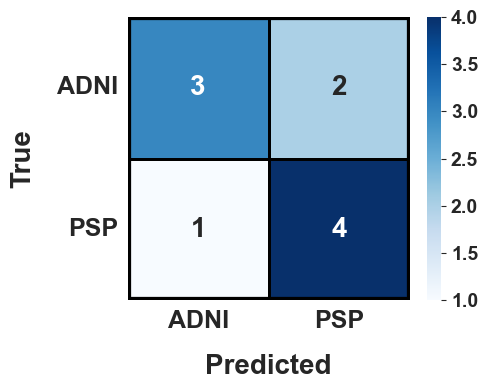

In [91]:
y_true = ['ADNI', 'ADNI', 'ADNI', 'PSP', 'PSP', 'PSP', 'PSP', 'ADNI', 'PSP', 'ADNI']
y_pred = ['ADNI', 'PSP', 'ADNI', 'PSP', 'PSP', 'ADNI', 'PSP', 'ADNI', 'PSP', 'PSP']
class_names = ['ADNI', 'PSP']

plot_confusion_matrix(
    y_true, y_pred,
    class_names=class_names,
    title="",
    save_path="confusion_matrix_test.png"
)